In [1]:
from importlib import reload
from src.GEFConstructor import CreateGEF
import matplotlib.pyplot  as plt
import numpy as np

In [ ]:
ntrs = [100]
atol = 1e-20 
rtol = 1e-6

success = {"n":[],"Nend":[], "tend":[]}
fail = {"n":[],"Nend":[], "tend":[]}

In [7]:
"""GEF1 = CreateGEF("Config/ClassicGEF-Test.py")
sol = GEF1.RunGEF(ntr, reachNend=True, printstats=True, atol=atol, rtol=rtol, withevents=False)
print(" ")"""
for ntr in ntrs:
    GEF1 = CreateGEF("Config/ClassicGEF-Test.py")
    tend, Nend, done = GEF1.RunGEF(ntr, tend=400, reachNend=True, printstats=True, atol=atol, rtol=rtol, withevents=True)
    if done:
        success["tend"].append(tend)
        success["Nend"].append(Nend)
        success["n"].append(ntr)
    else:
        fail["tend"].append(tend)
        fail["Nend"].append(Nend)
        fail["n"].append(ntr)
    print("")

No existing GEF data found. You can specify a file to load using GEF.LoadData or solve the GEF equations using GEF.RunGEF.
Attempting first run with ntr=191 and tend=400
The end of inflation was reached at t=206.0 and N=67.1.
Elapsed time: 254.2966 seconds
The following events occured during the run:
End of inflation at t=[206.] or N=[67.06]
Atol dominated at t=[0.] or N=[0.]

No existing GEF data found. You can specify a file to load using GEF.LoadData or solve the GEF equations using GEF.RunGEF.
Attempting first run with ntr=201 and tend=400
The end of inflation was reached at t=210.3 and N=67.2.
Elapsed time: 278.3610 seconds
The following events occured during the run:
End of inflation at t=[210.3] or N=[67.165]
Atol dominated at t=[0.] or N=[0.]

No existing GEF data found. You can specify a file to load using GEF.LoadData or solve the GEF equations using GEF.RunGEF.
Attempting first run with ntr=211 and tend=400
The end of inflation was reached at t=198.1 and N=66.8.
Elapsed time

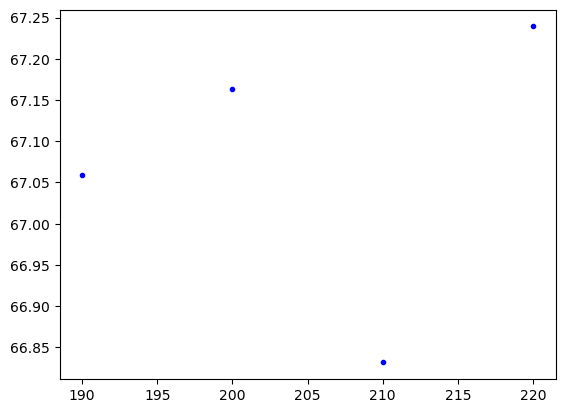

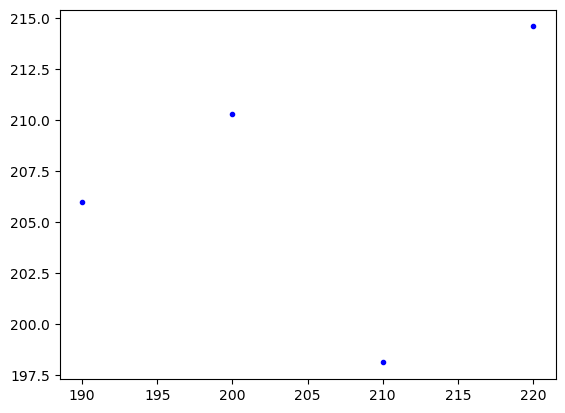

In [8]:

plt.plot(success["n"], success["Nend"], "b.")
plt.plot(fail["n"], fail["Nend"], "rx")
plt.show()
plt.plot(success["n"], success["tend"], "b.")
plt.plot(fail["n"], fail["tend"], "rx")
plt.show()


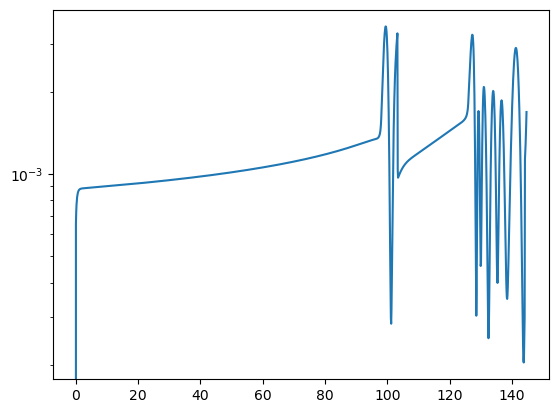

In [ ]:
plt.plot(sol.t, sol.y[-2,:])
plt.yscale("log")

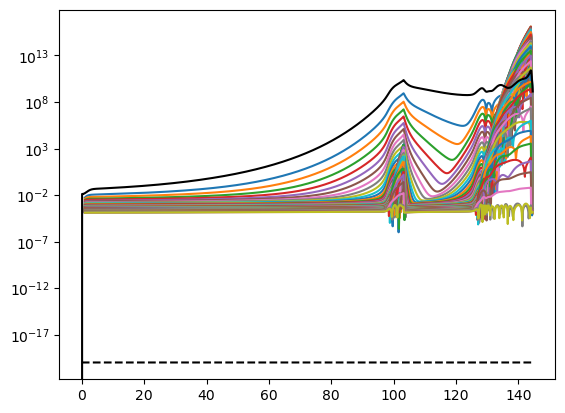

9.864793467231155e-07 1.309157357199691e+16 1.3271006246085602e+22


In [ ]:
minval = 1
maxval = 1
for i in range(1,ntr):
    arr = abs(sol.y[4+3*i+2,:][10:])
    minval = min(min(arr), minval)
    maxval = max(max(arr), maxval)
    if (arr==0.).any(): print(i)
    plt.plot(sol.t[10:], arr)
plt.yscale("log")
#plt.plot(sol.t, 1e25*sol.y[2], "k--")
plt.plot(sol.t, sol.y[4,:], "k")
plt.plot(sol.t, np.ones(sol.t.shape)*atol, "k--")
plt.show()
print(minval, maxval, maxval/minval)

72.04253731866578
71.66741734925047


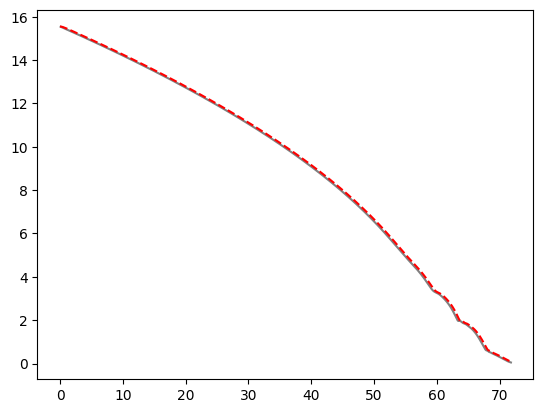

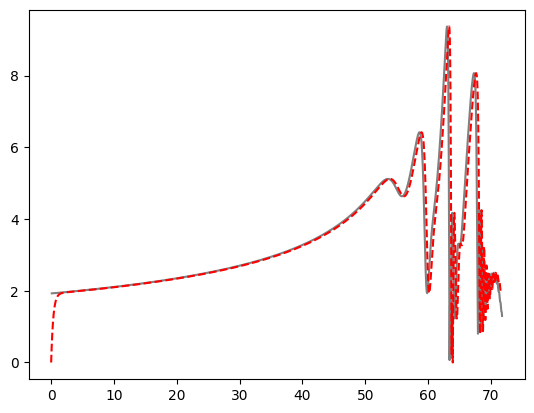

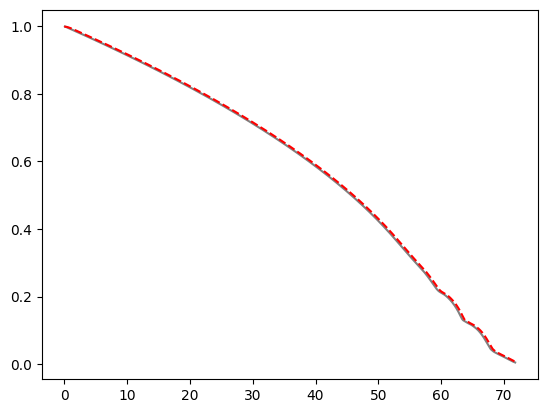

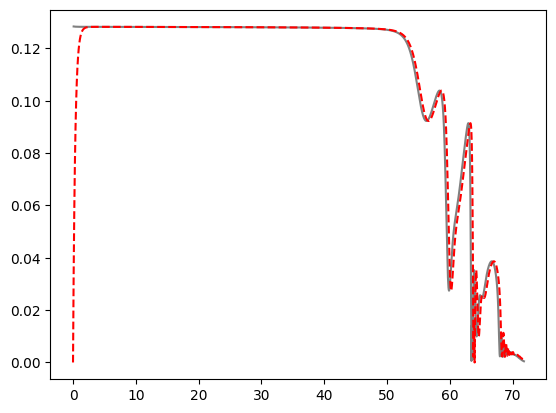

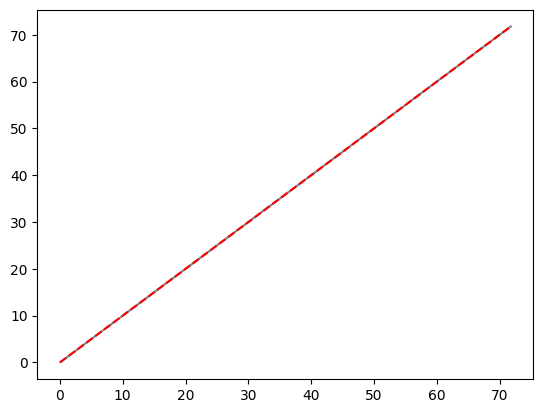

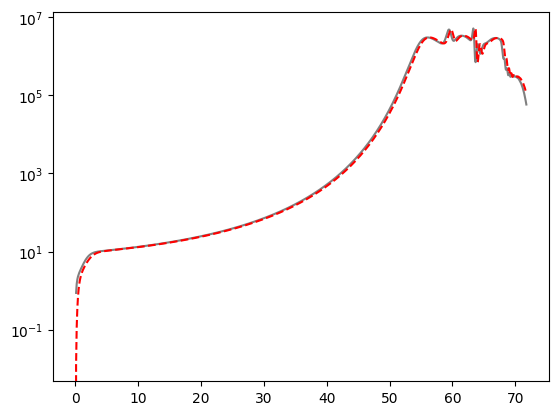

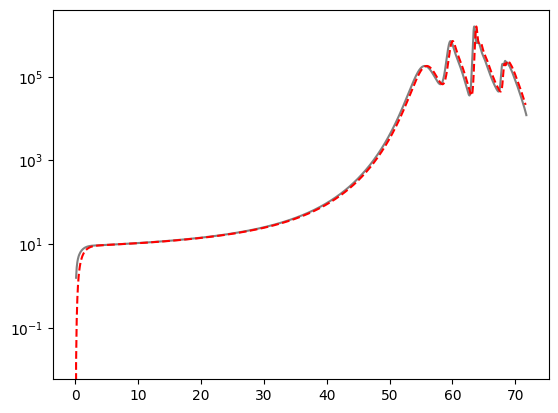

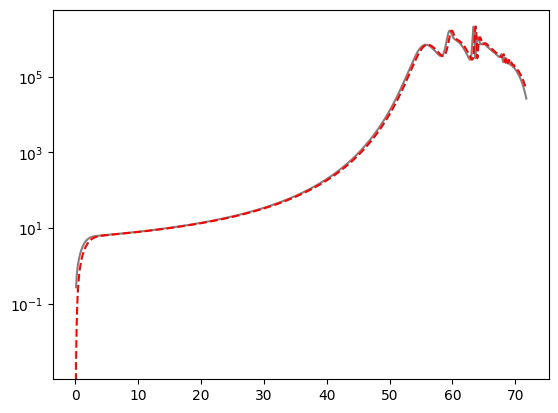

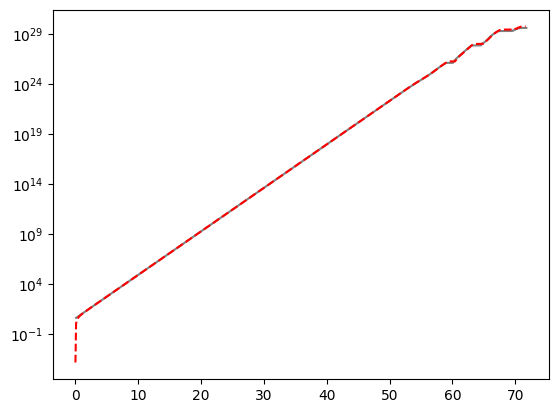

In [ ]:
keys = ["phi", "xi", "H", "dphi", "N"]
Nend1 = GEFComp.EndOfInflation()
print(Nend1)
Nend2 = GEF1.Nend
print(Nend2)
for key in keys:
    plt.plot(GEFComp.vals["N"], abs(GEFComp.vals[key]), "gray")
    plt.plot(GEF1.vals["N"], abs(GEF1.vals[key]), "r--")
    #plt.vlines(Nend1, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="orange")
    #plt.vlines(Nend2, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="red", linestyle="dashed")
    plt.show()
keys = ["E", "B", "G", "kh"]
for key in keys:
    plt.plot(GEFComp.vals["N"], abs(GEFComp.vals[key]), "gray")
    plt.plot(GEF1.vals["N"], abs(GEF1.vals[key]), "r--")
    #plt.vlines(Nend1, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="orange")
    #plt.vlines(Nend2, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="red", linestyle="dashed")
    plt.yscale("log")
    plt.show()
        
